In [43]:
import pandas as pd
import numpy as np
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
import pandasql as sql

In [44]:
data = pd.read_csv('Flight_Train.csv')

In [45]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [46]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [47]:
data.groupby(['Source','Destination'])['Total_Stops'].agg(pd.Series.mode)

Source    Destination
Banglore  Delhi          non-stop
          New Delhi        1 stop
Chennai   Kolkata        non-stop
Delhi     Cochin           1 stop
Kolkata   Banglore         1 stop
Mumbai    Hyderabad      non-stop
Name: Total_Stops, dtype: object

In [48]:
data['Total_Stops'] = data.groupby(['Source','Destination'])['Total_Stops'].transform(lambda x: x.fillna(x.mode()[0]))

In [49]:
data['Destination'].replace({'New Delhi':'Delhi'},inplace = True)

In [50]:
data.groupby(['Source','Destination'])['Route'].agg(pd.Series.mode)

Source    Destination
Banglore  Delhi                BLR ? DEL
Chennai   Kolkata              MAA ? CCU
Delhi     Cochin         DEL ? BOM ? COK
Kolkata   Banglore       CCU ? BOM ? BLR
Mumbai    Hyderabad            BOM ? HYD
Name: Route, dtype: object

In [51]:
data['Route'] = data.groupby(['Source','Destination'])['Route'].transform(lambda x:x.fillna(x.mode()[0]))

In [52]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [53]:
# null values are fixed 

<Axes: >

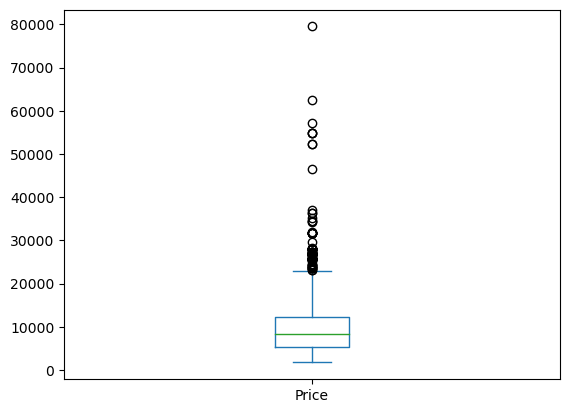

In [54]:
data.plot(kind = 'box')

In [55]:
# All the x variables are categorical. So, we need to perform One-Hot Encoding.
# Before Encoding, feature selection needs to be done

In [56]:
# All are unique values in Airline,Source,Destination column and no replace required.

In [57]:
# Date of Journey - are all falling in same year (2019). So on a high level this column doesn't have much significance with Flight rate prediction. 
# However, we can exract month detail from Date feature by which we can identify if there is any spike in rate since any particular month.
# now, how to identfy Month from Date ?

In [58]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'],dayfirst = True)

In [59]:
data['Month'] = data['Date_of_Journey'].dt.month

In [60]:
data['Month'].unique()

array([3, 5, 6, 4], dtype=int64)

In [61]:
data['Month'].replace({3:'March',4:'April',5:'May',6:'June'},inplace = True)

In [62]:
data = data.drop(columns ='Date_of_Journey')

In [63]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,Banglore,Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,March
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,May


In [64]:
data['Route'].nunique()

128

In [65]:
# There are 128 unique categorical value for Route. If we do One-Hot Encoding it is going to be very complex
# Also, Route can be covered under other columns : Source, Destination,Duration, Total_Stops
# So dropping Route column

In [66]:
data = data.drop(columns = 'Route')

In [67]:
# now, totally 2 columns has been dropped -  Date of Journey (replaced with month column) and Route

In [68]:
data['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [69]:
data['Duration_Min'] = (pd.to_timedelta(data['Duration']).dt.seconds // 60).astype(str)

In [70]:
data['Duration_Min'] 

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_Min, Length: 10683, dtype: object

In [71]:
# Successfully found a final way :)

In [72]:
data.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Duration_Min
0,IndiGo,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,March,170
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,May,445


In [73]:
# now dropping column Duration 

In [74]:
del data['Duration']

In [75]:
data.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Month,Duration_Min
0,IndiGo,Banglore,Delhi,22:20,01:10 22 Mar,non-stop,No info,3897,March,170
1,Air India,Kolkata,Banglore,05:50,13:15,2 stops,No info,7662,May,445


In [76]:
data.loc[data['Dep_Time'] < '12:00','Dep_Time']='AM'

In [77]:
data.loc[data['Dep_Time'] != 'AM','Dep_Time']='PM'

In [82]:
data['Arrival_Time'] = data['Arrival_Time'].apply(lambda x: x.split()[0])

In [88]:
data.loc[data['Arrival_Time'] < '12:00','Arrival_Time']='AM'

In [89]:
data.loc[data['Arrival_Time'] != 'AM','Arrival_Time']='PM'

In [93]:
data['Additional_Info'].replace({'No info':'No Info'},inplace = True)

In [92]:
data['Duration_Min'] = data['Duration_Min'].astype(int)

In [94]:
data.corr()

C:\Users\janani.jayavel\AppData\Local\Temp\ipykernel_14180\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Price,Duration_Min
Price,1.000000,0.449471
Duration_Min,0.449471,1.000000


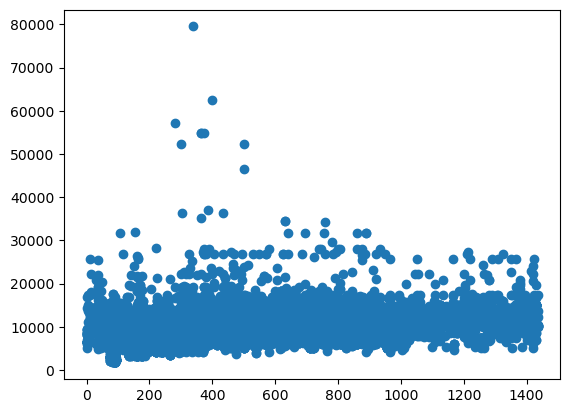

In [95]:
plt.scatter(data['Duration_Min'],data['Price'])
plt.show()

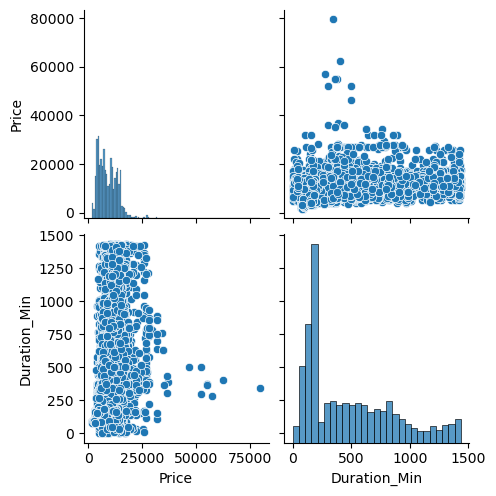

In [96]:
sns.pairplot(data)

In [81]:
# I don't find any linear relationship between dependent and numeric independent variables :( 
# so I feel linear regression may not be suitable for this prediction , but have to perform One-Hot Encoding for categorical data
# Still I am creating a model for practice :)

In [97]:
data.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Month,Duration_Min
0,IndiGo,Banglore,Delhi,PM,AM,non-stop,No Info,3897,March,170
1,Air India,Kolkata,Banglore,PM,PM,2 stops,No Info,7662,May,445


In [ ]:
# Fixed All columns and removed only Route column

In [98]:
data_cat = data.select_dtypes(exclude = np.number)

In [100]:
data_cat = pd.get_dummies(data_cat)

In [103]:
data_cat = data_cat.reset_index().drop(columns = 'index')

In [104]:
data_num = data.select_dtypes(include = np.number)

In [106]:
data_num = data_num.reset_index().drop(columns = 'index')

In [107]:
data_train = pd.concat([data_cat,data_num],axis = 1)

In [108]:
data_train.head(2)

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight,Month_April,Month_June,Month_March,Month_May,Price,Duration_Min
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,3897,170
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,7662,445


In [109]:
data_train_x = data_train.drop(columns = 'Price')

In [110]:
data_train_y = data_train['Price']

In [111]:
reg = LinearRegression()

In [112]:
reg.fit(data_train_x,data_train_y)

LinearRegression()

In [113]:
reg.intercept_

4808821138078.198

In [114]:
reg.coef_

array([-4.80882112e+12, -4.80882112e+12, -4.80882112e+12, -4.80882112e+12,
       -4.80882112e+12, -4.80882108e+12, -4.80882112e+12, -4.80882112e+12,
       -4.80882112e+12, -4.80882113e+12, -4.80882112e+12, -4.80882112e+12,
        2.90968598e+02,  1.68190658e+02,  4.77803652e+01,  1.50668751e+02,
       -6.46910599e+02,  1.51779730e+02,  4.90179880e+01,  2.73519827e+02,
       -6.43888871e+02,  1.69463445e+02,  9.76562500e-04,  2.94580256e+01,
       -2.94457329e+01, -7.11303539e+02,  1.07137621e+03,  2.42895799e+03,
        1.49107918e+03, -4.28014613e+03,  2.16702620e+03,  7.47080880e+03,
        7.25980375e+03,  9.00042820e+03, -1.97966770e+03, -1.00301646e+04,
       -6.31485325e+03, -6.46901992e+03, -1.10431289e+03, -1.11493370e+03,
       -2.56010161e+02,  1.41128086e+03, -4.02287718e+01,  1.56177784e-01])

In [115]:
data_train_predict = reg.predict(data_train_x)

In [117]:
residual = data_train_y - data_train_predict

<Axes: xlabel='Price', ylabel='Density'>

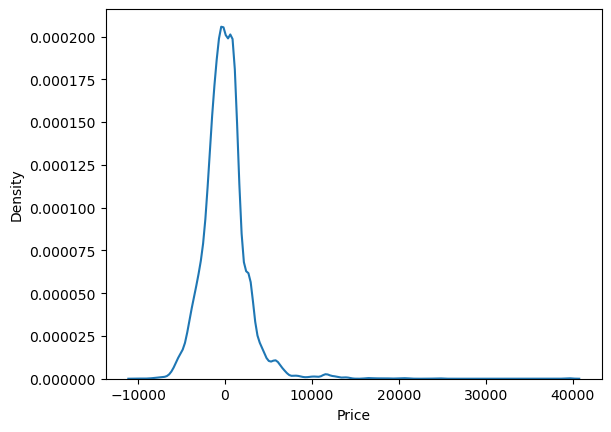

In [118]:
sns.kdeplot(residual)

In [119]:
def Error_Metrics(actual,predicted):
    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    mae = mean_absolute_error(actual,predicted)
    mape = mean_absolute_percentage_error(actual,predicted)
    rscore = r2_score(actual,predicted)
    print("mse:",mse,"\nrmse:",rmse,"\nmae:",mae,"\nmape:",mape,"\nR-Score:",rscore)

In [120]:
print("Error Metrics Of Train Data")
Error_Metrics(data_train_y,data_train_predict)

Error Metrics Of Train Data
mse: 6634402.852153334 
rmse: 2575.7334590662394 
mae: 1743.6243845178965 
mape: 0.2116500228092523 
R-Score: 0.6879784466251699


## Working on Test data 

In [174]:
data_test = pd.read_csv('Flight_Test.csv')

In [175]:
data_test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [122]:
# super no null values :)

In [176]:
data_test['Destination'].replace({'New Delhi':'Delhi'},inplace = True)

In [177]:
data_test['Date_of_Journey'] = pd.to_datetime(data_test['Date_of_Journey'],dayfirst = True)

In [178]:
data_test['Month'] = data_test['Date_of_Journey'].dt.month

In [179]:
data_test['Month'].replace({3:'March',4:'April',5:'May',6:'June'},inplace = True)

In [180]:
data_test.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Month
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,June
1,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info,May


In [181]:
data_test['Arrival_Time'] = data_test['Arrival_Time'].apply(lambda x: x.split()[0])

In [182]:
data_test.loc[data_test['Dep_Time'] < '12:00','Dep_Time']='AM'

In [183]:
data_test.loc[data_test['Dep_Time'] != 'AM','Dep_Time']='PM'

In [184]:
data_test.loc[data_test['Arrival_Time'] < '12:00','Arrival_Time']='AM'

In [185]:
data_test.loc[data_test['Arrival_Time'] != 'AM','Arrival_Time']='PM'

In [186]:
data_test.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Month
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL ? BOM ? COK,PM,AM,10h 55m,1 stop,No info,June
1,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? MAA ? BLR,AM,AM,4h,1 stop,No info,May


In [187]:
del data_test['Date_of_Journey']

In [188]:
del data_test['Route']

In [189]:
data_test['Duration_Min'] = (pd.to_timedelta(data_test['Duration']).dt.seconds // 60).astype(int)

In [190]:
data_test = data_test.drop(columns = 'Duration')

In [191]:
data_test.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Month,Duration_Min
0,Jet Airways,Delhi,Cochin,PM,AM,1 stop,No info,June,655
1,IndiGo,Kolkata,Banglore,AM,AM,1 stop,No info,May,240


In [ ]:
# Price column is not given in test data. Ideally, we need to predict the Price


In [192]:
data_test_cat = data_test.select_dtypes(exclude = np.number)

In [193]:
data_test_cat

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Month
0,Jet Airways,Delhi,Cochin,PM,AM,1 stop,No info,June
1,IndiGo,Kolkata,Banglore,AM,AM,1 stop,No info,May
2,Jet Airways,Delhi,Cochin,PM,PM,1 stop,In-flight meal not included,May
3,Multiple carriers,Delhi,Cochin,AM,PM,1 stop,No info,May
4,Air Asia,Banglore,Delhi,PM,AM,non-stop,No info,June
...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,PM,PM,1 stop,No info,June
2667,IndiGo,Kolkata,Banglore,PM,PM,non-stop,No info,March
2668,Jet Airways,Delhi,Cochin,PM,AM,1 stop,No info,March
2669,Air India,Delhi,Cochin,AM,PM,1 stop,No info,March


In [194]:
data_test_cat = pd.get_dummies(data_test_cat)

In [195]:
data_test_cat = data_test_cat.reindex(columns=data_cat.columns).fillna(0)

In [205]:
data_test_cat.shape

(2671, 43)

In [197]:
data_cat.shape

(10683, 43)

In [ ]:
#Hurray! both the columns matched :D

In [206]:
data_test['Duration_Min'] = data_test['Duration_Min'].astype('int')

In [207]:
data_test_num = data_test.select_dtypes(include = np.number)

In [208]:
data_test_cat = data_test_cat.reset_index().drop(columns = 'index')

In [210]:
data_test_num = data_test_num.reset_index().drop(columns = 'index')

In [213]:
data_test = pd.concat([data_test_cat,data_test_num],axis = 1)

In [214]:
data_test.head(2)

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight,Month_April,Month_June,Month_March,Month_May,Duration_Min
0,0,0,0,0,1,0,0,0,0,0.0,...,0,0,0.0,0,0.0,0,1,0,0,655
1,0,0,0,1,0,0,0,0,0,0.0,...,0,0,0.0,0,0.0,0,0,0,1,240


In [203]:
data_train_x.shape

(10683, 44)

In [215]:
# now, i dont have my y or dependent value - so i cannot fit.

In [216]:
test_predict = reg.predict(data_test) 

In [ ]:
# can't predict residual as we don't have test_y (Price)

In [218]:
data_test_dum = pd.read_csv('Flight_Test.csv')

In [219]:
test_predict = pd.DataFrame(test_predict)

In [220]:
test_predict['Price']= test_predict

In [221]:
test_predict = test_predict.drop(columns = [0])

In [222]:
data_test_predict = pd.concat([data_test_dum,test_predict],axis = 1)

In [223]:
data_test_predict.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,19556.427734
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info,14136.011719


In [ ]:
### now comparing few test data with train data below to see the accuracy of the model prediction

In [224]:
data_ = pd.read_csv('Flight_Train.csv')

In [226]:
q1 = "select * from data_ where Airline = 'Jet Airways' and Source= 'Delhi' and Destination ='Cochin' and Total_Stops = '1 stop'and Duration = '10h 55m' and Route = 'DEL ? BOM ? COK'"

In [227]:
sql.sqldf(q1,locals())

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,27/03/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 28 Mar,10h 55m,1 stop,In-flight meal not included,6540
1,Jet Airways,15/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 16 Jun,10h 55m,1 stop,In-flight meal not included,10262
2,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,In-flight meal not included,10262
3,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 22 May,10h 55m,1 stop,In-flight meal not included,12898
4,Jet Airways,18/05/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 19 May,10h 55m,1 stop,In-flight meal not included,12373
5,Jet Airways,3/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 04 Jun,10h 55m,1 stop,No info,14714
6,Jet Airways,3/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 04 Jun,10h 55m,1 stop,In-flight meal not included,10262
7,Jet Airways,21/03/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 22 Mar,10h 55m,1 stop,No info,12557
8,Jet Airways,9/05/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 10 May,10h 55m,1 stop,In-flight meal not included,12373
9,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 10 Jun,10h 55m,1 stop,In-flight meal not included,10262


In [ ]:
# 16 rows with the given specification is found in Train Data , so trying to take a mean of it :)

In [228]:
q1 = "select Price from data_ where Airline = 'Jet Airways' and Source= 'Delhi' and Destination ='Cochin' and Total_Stops = '1 stop'and Duration = '10h 55m' and Route = 'DEL ? BOM ? COK'"

In [229]:
sql.sqldf(q1,locals()).sum()

Price    185606
dtype: int64

In [230]:
185606/16

11600.375

In [ ]:
''' Actual Average Price from all the 16 Train data with Airlin = Jet Airways from Delhi to cochin with 1 stop
and Duration 10h 55m and Route = DEL ? BOM ? COK is ---> 11600.375''' 

In [ ]:
# now am taking average price from Test with same condition :)


In [231]:
q1 = "select Price from data_test_predict where Airline = 'Jet Airways' and Source= 'Delhi' and Destination ='Cochin' and Total_Stops = '1 stop'and Duration = '10h 55m' and Route = 'DEL ? BOM ? COK'"

In [232]:
sql.sqldf(q1,locals()).sum()

Price    50306.40918
dtype: float64

In [235]:
50306.40918/3

16768.803060000002

In [ ]:
''' Actual Average Price from all the 16 Train data with Airline = Jet Airways from Delhi to cochin with 1 stop
and Duration 10h 55m and Route = DEL ? BOM ? COK is ---> 11600.375''' 

In [ ]:
''' Predicted Average Price from all the 3 Test data with Airline = Jet Airways from Delhi to cochin with 1 stop
and Duration 10h 55m and Route = DEL ? BOM ? COK is ---> 16768.803060000002
'''

In [ ]:
# Model completed

In [ ]:
# Doubt :

In [ ]:
'''
Predicted Average Price from all the 3 Test data with Airline = Jet Airways from Delhi to cochin with 1 stop
and Duration 10h 55m and Route = DEL ? BOM ? COK is ---> 10417.5
(without Airlines,Additional Info,Dep_Time, Arrival_Time columns)
''' 